# Plant Disease Detection

Imports

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

Parameters

In [2]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10
MODEL_PATH = "models/plant_disease_model.keras"

Load and preprocess the data

In [4]:
train_dir = "data/train"
val_dir = "data/test"

print("Loading training data...")
train_ds = image_dataset_from_directory(
    train_dir,
    validation_split=0.0,
    label_mode='int',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

print("Loading validation data...")
val_ds = image_dataset_from_directory(
    val_dir,
    label_mode='int',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# Normalize pixel values (0-255 to 0-1)
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

Loading training data...
Found 3908 files belonging to 4 classes.
Loading validation data...
Found 3908 files belonging to 4 classes.
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight']


Visualize some samples 

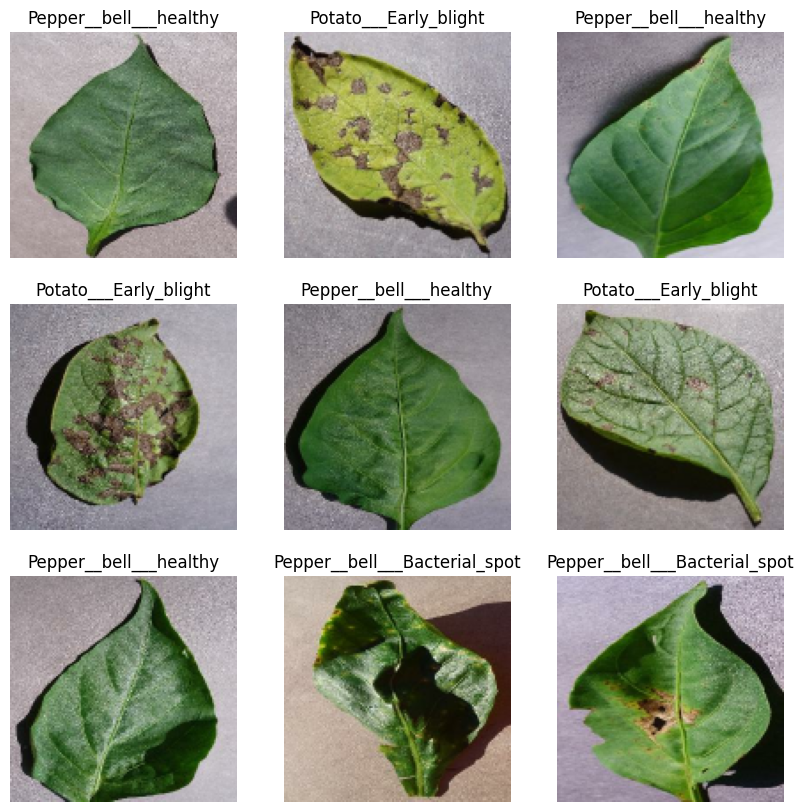

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

Building the CNN Model

In [6]:
model = models.Sequential([
    layers.InputLayer(input_shape=(*IMG_SIZE, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

c:\Users\Djafari\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,156 (12.64 MB)

 Trainable params: 3,313,156 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

Train the model with EarlyStopping and ModelCheckpoint callbacks

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 30s 220ms/step - accuracy: 0.4782 - loss: 1.1480 - val_accuracy: 0.8060 - val_loss: 0.4731
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 28s 227ms/step - accuracy: 0.8021 - loss: 0.5282 - val_accuracy: 0.8861 - val_loss: 0.3281
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 27s 218ms/step - accuracy: 0.8691 - loss: 0.3880 - val_accuracy: 0.9529 - val_loss: 0.1498
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 27s 218ms/step - accuracy: 0.9101 - loss: 0.2595 - val_accuracy: 0.9693 - val_loss: 0.1080
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 27s 223ms/step - accuracy: 0.9254 - loss: 0.2021 - val_accuracy: 0.9237 - val_loss: 0.2057
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 204ms/step - accuracy: 0.9249 - loss: 0.2239 - val_accuracy: 0.9846 - val_loss: 0.0460
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 28s 227ms/step - accuracy: 0.9704 - loss: 0.0954 - val_accuracy: 0.9895 - val_loss: 0.0346
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 28s 225ms/step - accuracy: 0.9642 - loss: 0

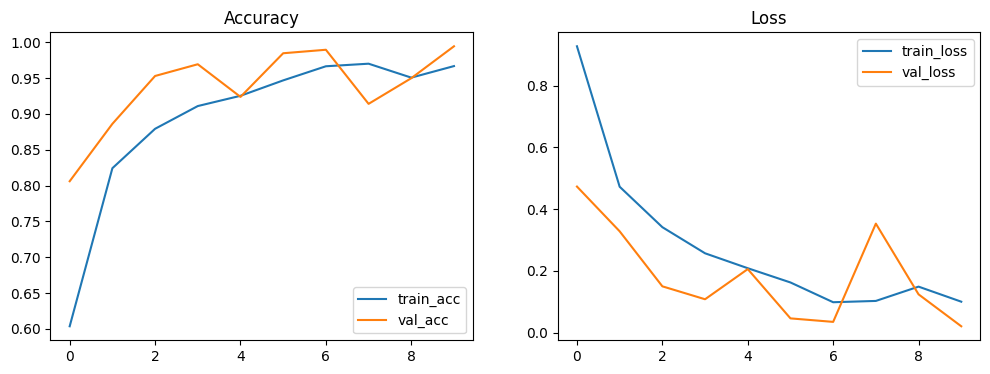

In [7]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(MODEL_PATH, save_best_only=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

# 7. Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')

plt.show()


Load best saved model

In [8]:
print(f"Loading best model from {MODEL_PATH}")
best_model = tf.keras.models.load_model(MODEL_PATH)

Loading best model from models/plant_disease_model.keras


Define prediction helper function

In [9]:
def preprocess_image(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)
    img_array = tf.keras.utils.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # batch dimension
    return img_array

def predict_image(model, img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)[0]
    top_idx = np.argmax(predictions)
    confidence = predictions[top_idx]
    class_name = class_names[top_idx]
    return class_name, confidence

Test prediction on a sample image

In [11]:
sample_image_path = "data/test/Potato___Late_blight/00b1f292-23dd-44d4-aad3-c1ffb6a6ad5a___RS_LB 4479.jpg"  # Change to your image path

predicted_class, confidence = predict_image(best_model, sample_image_path)
print(f"Prediction: {predicted_class} (Confidence: {confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Prediction: Potato___Late_blight (Confidence: 1.00)


Save final model

In [12]:
best_model.save(MODEL_PATH)
print(f"Model saved at {MODEL_PATH}")

Model saved at models/plant_disease_model.keras
